In [1]:
import pandas as pd
import numpy as np
import datalib_mt5 as dlm
import matplotlib.pyplot as plt
import matplotlib as mlt
import pickle
import time
import sqlite3
import tensorflow as tf
import thread_main_loop as tml
import thread_training
import queue
import threading
import random
import my_pre_processing_routine as mpr
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import RMSprop

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)
print(tf.__version__)

2.3.0


#### Build

In [ ]:
dlm.insert_db()

In [2]:
df = dlm.request_table()

In [3]:
df.t_DATE.unique()

array(['2020.08.10', '2020.08.11', '2020.08.12', '2020.08.13',
       '2020.08.14', '2020.08.18', '2020.08.19', '2020.08.20',
       '2020.08.21', '2020.08.24', '2020.08.25', '2020.08.26',
       '2020.08.27', '2020.08.28', '2020.08.31', '2020.09.01',
       '2020.09.02', '2020.09.03', '2020.09.04', '2020.09.08',
       '2020.09.09', '2020.09.10', '2020.09.11', '2020.09.14',
       '2020.09.16', '2020.09.18'], dtype=object)

In [4]:
shift = 10
target = 5
time_step = 30
full_feature_list = ['t_BID','t_ASK','t_LAST','iAC','iAD','iADX','iADXWilder','iAlligator','iAMA','iAO','iATR','iBearsPower','iBands','iBullsPower','iCCI','iChaikin','iDEMA','iDeMarker','iEnvelopes','iForce','iFractals','iFrAMA','iIchimoku','iBWMFI','iMomentum','iMFI','iMA','iOsMA','iMACD','iOBV','iSAR','iRSI','iRVI','iStdDEV','iStochastic','iTEMA','iTriX','iWPR','iVIDyA','iVolumes']
df, x_, y_= mpr.process_dataset(df, False,  shift, target, full_feature_list, time_step, True)

In [ ]:
columns=['t_DATE', 't_TIME','t_SEC', 't_BID', 't_ASK', 't_LAST', 't_VOLUME', 't_TYPE', 'iAC', 'iAD', 'iADX', 'iADXWilder', 'iAlligator', 'iAMA', 'iAO', 'iATR', 'iBearsPower', 'iBands', 'iBullsPower', 'iCCI', 'iChaikin', 'iDEMA', 'iDeMarker', 'iEnvelopes', 'iForce', 'iFractals', 'iFrAMA', 'iIchimoku', 'iBWMFI', 'iMomentum', 'iMFI', 'iMA', 'iOsMA', 'iMACD', 'iOBV', 'iSAR', 'iRSI', 'iRVI', 'iStdDEV', 'iStochastic', 'iTEMA', 'iTriX', 'iWPR', 'iVIDyA', 'iVolumes']

In [2]:
df = pd.read_pickle('m10_30_df')

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
t_BID,12452.0,5.429387e+03,1.151684e+02,5.214000e+03,5331.000000,5.410500e+03,5.527500e+03,5.901500e+03
t_ASK,12452.0,5.429526e+03,1.150720e+02,4.991000e+03,5331.500000,5.410500e+03,5.527000e+03,5.674000e+03
t_LAST,12452.0,5.429444e+03,1.149164e+02,5.214500e+03,5331.375000,5.410500e+03,5.527000e+03,5.674000e+03
t_VOLUME,12452.0,2.232814e+00,3.364482e+00,1.000000e+00,1.000000,1.000000e+00,2.000000e+00,6.000000e+01
t_TYPE,12452.0,4.852233e-01,4.998017e-01,0.000000e+00,0.000000,0.000000e+00,1.000000e+00,1.000000e+00
iAC,12452.0,-1.421129e-01,6.619679e+00,-2.725941e+01,-3.801838,3.585295e-01,3.890588e+00,2.676265e+01
iAD,12452.0,1.497803e+06,1.561185e+06,-1.012379e+06,-140484.816794,1.673281e+06,3.102470e+06,3.902211e+06
iADX,12452.0,3.266194e+01,1.307881e+01,1.040174e+01,22.618944,2.987268e+01,4.015036e+01,7.982551e+01
iADXWilder,12452.0,2.739788e+01,1.164294e+01,8.036814e+00,18.854743,2.484099e+01,3.306730e+01,6.787167e+01
iAlligator,12452.0,5.432361e+03,1.129427e+02,5.240044e+03,5327.649135,5.419484e+03,5.539591e+03,5.627856e+03


#### Volume 1

Text(0, 0.5, 'iVolumes')

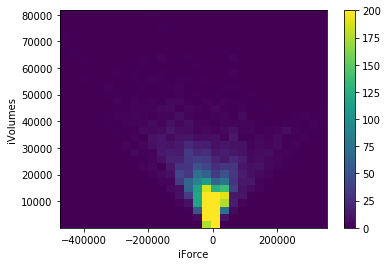

In [4]:
plt.hist2d(df['iForce'], df['iVolumes'], bins=(30, 30), vmax=200)
plt.colorbar()
plt.xlabel('iForce')
plt.ylabel('iVolumes')

In [5]:
v = df['iVolumes']
v_rad = df['iForce']*np.pi / 180
df['Vx'] = v*np.cos(v_rad)
df['Vy'] = v*np.sin(v_rad)
df=df.drop(columns=['iVolumes','iForce','t_VOLUME'])

(-64790.15349197547, 57612.43991097653, -73228.4318218107, 62284.166339255564)

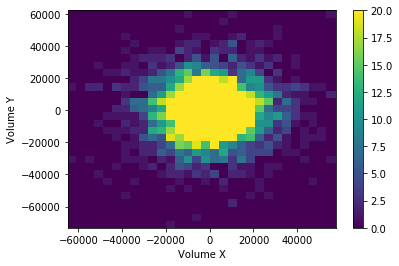

In [6]:
plt.hist2d(df['Vx'], df['Vy'], bins=(30, 30), vmax=20)
plt.colorbar()
plt.xlabel('Volume X')
plt.ylabel('Volume Y')
ax = plt.gca()
ax.axis('tight')

#### Volume 2

In [ ]:
df.loc[(df['t_TYPE'] == 0),'t_TYPE'] = -1

In [ ]:
plt.hist2d(df['t_TYPE'], df['t_VOLUME'], bins=(30, 30), vmax=200)
plt.colorbar()
plt.xlabel('t_TYPE')
plt.ylabel('t_VOLUME')

In [ ]:
v = df['t_VOLUME']
v_rad = df['t_TYPE']*np.pi / 180
df['Vx'] = v*np.cos(v_rad)
df['Vy'] = v*np.sin(v_rad)
#df=df.drop(columns=['iVolumes','iForce','t_VOLUME'])

In [ ]:
plt.hist2d(df['Vx'], df['Vy'], bins=(30, 30), vmax=20)
plt.colorbar()
plt.xlabel('Volume X')
plt.ylabel('Volume Y')
ax = plt.gca()
ax.axis('tight')

#### Time

Transform time values in sin and cossine, witch is way better to model to interpret

In [7]:
df['t_DATE-TIME']=df['t_DATE']+" "+df['t_TIME']
df['t_DATE-TIME']
date_time = pd.to_datetime(df.pop('t_DATE-TIME'), format='%Y.%m.%d %H:%M')
df = df.drop(columns=['t_DATE', 't_TIME', 't_SEC'])
date_time

0       2020-08-10 09:05:00
1       2020-08-10 09:06:00
2       2020-08-10 09:07:00
3       2020-08-10 09:08:00
4       2020-08-10 09:09:00
                ...        
12447   2020-09-18 17:45:00
12448   2020-09-18 17:46:00
12449   2020-09-18 17:47:00
12450   2020-09-18 17:48:00
12451   2020-09-18 17:49:00
Name: t_DATE-TIME, Length: 12452, dtype: datetime64[ns]

In [8]:
import datetime
timestamp_s = date_time.map(datetime.datetime.timestamp)
timestamp_s

0        1.597061e+09
1        1.597061e+09
2        1.597061e+09
3        1.597061e+09
4        1.597061e+09
             ...     
12447    1.600462e+09
12448    1.600462e+09
12449    1.600462e+09
12450    1.600462e+09
12451    1.600462e+09
Name: t_DATE-TIME, Length: 12452, dtype: float64

In [9]:
day = 24*60*60
df['day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['day cos'] = np.cos(timestamp_s * (2 * np.pi / day))

Text(0.5, 1.0, 'time signal')

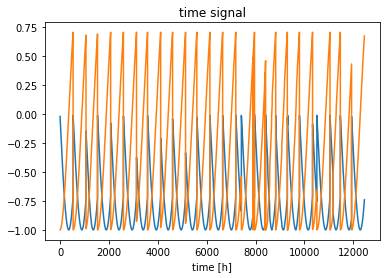

In [10]:
plt.plot(np.array(df['day sin'])[:])
plt.plot(np.array(df['day cos'])[:])
plt.xlabel('time [h]')
plt.title('time signal')

In [11]:
df.columns

Index(['t_BID', 't_ASK', 't_LAST', 't_TYPE', 'iAC', 'iAD', 'iADX',
       'iADXWilder', 'iAlligator', 'iAMA', 'iAO', 'iATR', 'iBearsPower',
       'iBands', 'iBullsPower', 'iCCI', 'iChaikin', 'iDEMA', 'iDeMarker',
       'iEnvelopes', 'iFractals', 'iFrAMA', 'iIchimoku', 'iBWMFI', 'iMomentum',
       'iMFI', 'iMA', 'iOsMA', 'iMACD', 'iOBV', 'iSAR', 'iRSI', 'iRVI',
       'iStdDEV', 'iStochastic', 'iTEMA', 'iTriX', 'iWPR', 'iVIDyA',
       't_LAST_Shift', 't_TIME_Shift', 't_LAST_DELTA', 't_POS_const',
       't_POS_up', 't_POS_down', 'Vx', 'Vy', 'day sin', 'day cos'],
      dtype='object')

In [ ]:
plot_cols = feature_list[:3]
plot_features = df[plot_cols][:500]
plot_features.index = date_time[:500]
_ = plot_features.plot(subplots=True)

#### !!! Research for FFT interpretation

In [ ]:
plt.figure(figsize=(6, 80))
full_feature_list = df.columns
for index in range(len(full_feature_list)):
    plt.subplot(len(full_feature_list), 1, index+1)
    fft = tf.signal.rfft(df[full_feature_list[index]])
    f_per_dataset = np.arange(0, len(fft))

    n_samples_h = 60
    hours_per_week = 9*5
    years_per_dataset = n_samples_h/(hours_per_week)

    f_per_year = f_per_dataset/years_per_dataset
    plt.step(f_per_year, np.abs(fft))
    plt.xscale('log')
    plt.ylim(0, 100000)
    plt.xlim([0.1, max(plt.xlim())])
    plt.xticks([1, 2700], labels=['1/hr', '1/min'])
    _ = plt.xlabel('Frequency (log scale)')
    plt.title(full_feature_list[index])

In [ ]:
column_indices = {name: i for i, name in enumerate(df.columns)}

In [ ]:
#n = len(df)
#train_df = df[0:int(n*0.7)]
#val_df = df[int(n*0.7):int(n*0.9)]
#test_df = df[int(n*0.9):]

#num_features = df.shape[1]

In [15]:
'iAC', 'iAD', 'iADX', 'iADXWilder', 'iAlligator', 'iAMA', 'iAO', 'iATR', 'iBearsPower', 'iBands', 'iBullsPower', 'iCCI', 'iChaikin', 'iDEMA', 'iDeMarker', 'iEnvelopes', 'iForce', 'iFractals', 'iFrAMA', 'iIchimoku', 'iBWMFI', 'iMomentum', 'iMFI', 'iMA', 'iOsMA', 'iMACD', 'iOBV', 'iSAR', 'iRSI', 'iRVI', 'iStdDEV', 'iStochastic', 'iTEMA', 'iTriX', 'iWPR', 'iVIDyA'

In [12]:
def pre_processing(df):
    df['t_BID']=(df['t_BID'] - df['iTEMA']) / df['iStdDEV']
    df['t_ASK']=(df['t_ASK'] - df['iTEMA']) / df['iStdDEV']
    df['t_LAST']=(df['t_LAST'] - df['iTEMA']) / df['iStdDEV']
    df['iStochastic']=(df['iStochastic']-df['iStochastic'].mean()) / df['iStochastic'].std()
    df['iMFI']=(df['iMFI']-df['iMFI'].mean()) / df['iMFI'].std()
    df['iMomentum']=(df['iMomentum']-df['iMomentum'].mean()) / df['iMomentum'].std()
    
    df['iBearsPower']=(df['iBearsPower']-df['iBearsPower'].mean()) / df['iBearsPower'].std()
    df['iBands']=(df['iBands']-df['iBands'].mean()) / df['iBands'].std()
    df['iBullsPower']=(df['iBullsPower']-df['iBullsPower'].mean()) / df['iBullsPower'].std()
    df['iCCI']=(df['iCCI']-df['iCCI'].mean()) / df['iCCI'].std()
    df['iChaikin']=(df['iChaikin']-df['iChaikin'].mean()) / df['iChaikin'].std()
    df['iDEMA']=(df['iDEMA']-df['iDEMA'].mean()) / df['iDEMA'].std()
    df['iEnvelopes']=(df['iEnvelopes']-df['iEnvelopes'].mean()) / df['iEnvelopes'].std()
    df['iDeMarker']=(df['iDeMarker']-df['iDeMarker'].mean()) / df['iDeMarker'].std()
    df['iFrAMA']=(df['iFrAMA']-df['iFrAMA'].mean()) / df['iFrAMA'].std()
    df['iIchimoku']=(df['iIchimoku']-df['iIchimoku'].mean()) / df['iIchimoku'].std()
    df['iBWMFI']=(df['iBWMFI']-df['iBWMFI'].mean()) / df['iBWMFI'].std()
    df['iOsMA']=(df['iOsMA']-df['iOsMA'].mean()) / df['iOsMA'].std()
    df['iMACD']=(df['iMACD']-df['iMACD'].mean()) / df['iMACD'].std()
    df['iOBV']=(df['iOBV']-df['iOBV'].mean()) / df['iOBV'].std()
    df['iSAR']=(df['iSAR']-df['iSAR'].mean()) / df['iSAR'].std()
    
    
    df['Vx']=(df['Vx']-df['Vx'].mean()) / df['Vx'].std()
    df['Vy']=(df['Vy']-df['Vy'].mean()) / df['Vy'].std()
    #df = df.drop(columns=['iTEMA'])
    return df
df= pre_processing(df)  
#train_df = pre_processing(train_df)
#val_df = pre_processing(val_df)
#test_df = pre_processing(test_df)

In [13]:
df

,t_BID,t_ASK,t_LAST,t_TYPE,iAC,iAD,iADX,iADXWilder,iAlligator,iAMA,iAO,iATR,iBearsPower,iBands,iBullsPower,iCCI,iChaikin,iDEMA,iDeMarker,iEnvelopes,iFractals,iFrAMA,iIchimoku,iBWMFI,iMomentum,iMFI,iMA,iOsMA,iMACD,iOBV,iSAR,iRSI,iRVI,iStdDEV,iStochastic,iTEMA,iTriX,iWPR,iVIDyA,t_LAST_Shift,t_TIME_Shift,t_LAST_DELTA,t_POS_const,t_POS_up,t_POS_down,Vx,Vy,day sin,day cos
0,-1.283995,-1.203268,-1.283995,1,3.970588,1.010346e+06,18.239431,18.508609,5424.631021,5429.410395,4.560294,9.071429,-0.176327,-0.032696,0.503986,0.103162,-0.296997,0.009677,0.605909,-0.026911,0.0,-0.031311,-0.000712,-0.001409,-0.068976,-0.722345,5428.00,0.246716,0.300679,1.011544,-0.108417,47.685062,0.102775,6.193696,0.011914,5431.452674,0.000027,-71.666667,5420.971868,5419.5,09:15,-4.0,1.0,0.0,0.0,2.139642,0.146762,-0.021815,-0.999762
1,-1.475188,-1.395488,-1.475188,1,3.936471,1.000479e+06,18.165860,18.435782,5424.631021,5429.404214,4.517647,9.107143,-0.190981,-0.033572,0.524179,0.004971,-0.389488,0.005373,0.582536,-0.028160,0.0,-0.031740,-0.000712,0.004205,-0.126538,-0.729347,5427.80,0.208717,0.285625,1.010695,-0.108417,46.551581,0.098563,6.273506,-0.084324,5430.754600,0.000026,-78.333333,5420.962638,5410.5,09:16,-11.0,0.0,0.0,1.0,-1.607128,-1.513912,-0.026177,-0.999657
2,-0.794756,-0.713198,-0.713198,0,3.936471,1.041720e+06,18.165860,18.435782,5424.631021,5429.404214,4.517647,9.107143,-0.264251,-0.030287,0.448454,0.292959,-0.001169,0.021513,0.582536,-0.023479,0.0,-0.030131,-0.000712,-0.028261,0.089317,-0.828651,5428.55,0.351212,0.342076,0.998109,-0.108417,51.107176,0.113963,6.130661,0.326017,5433.372377,0.000030,-53.333333,5420.997643,5408.5,09:17,-20.5,0.0,0.0,1.0,0.125430,2.881275,-0.030539,-0.999534
3,-1.133709,-1.052454,-1.133709,1,3.936471,1.006114e+06,18.165860,18.435782,5424.631021,5429.404214,4.517647,9.107143,-0.225174,-0.032039,0.488841,0.141857,-0.336466,0.012905,0.582536,-0.025975,0.0,-0.030989,-0.000712,-0.025742,-0.025807,-0.879733,5428.15,0.275215,0.311969,0.991086,-0.108417,48.572070,0.105749,6.153454,0.107168,5431.976229,0.000028,-66.666667,5420.969177,5409.0,09:18,-16.0,0.0,0.0,1.0,-2.866835,1.553857,-0.034899,-0.999391
4,-1.732413,-1.654070,-1.654070,0,3.731765,9.701307e+05,17.797412,18.024343,5424.631021,5429.376774,4.261765,9.321429,-0.376597,-0.034448,0.544372,-0.187453,-0.662893,0.001069,0.450229,-0.029408,0.0,-0.032169,-0.000712,0.006447,-0.184100,-0.951860,5427.60,0.170719,0.270572,0.980472,0.108534,45.470734,0.093878,6.382153,-0.109432,5430.056526,0.000025,-85.000000,5420.939686,5412.5,09:19,-7.0,0.0,0.0,1.0,-3.681741,-1.073373,-0.039260,-0.999229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12447,0.177661,0.212982,0.177661,1,0.530294,7.924014e+05,69.377694,65.478003,5337.720262,5375.340830,37.897059,8.642857,1.297235,-0.570546,1.355506,1.366065,0.626376,-0.343433,1.902822,-0.518091,0.0,-0.446537,-0.428215,0.109871,1.448493,1.729508,5378.25,0.176048,1.776827,-0.806124,-0.585782,80.265715,0.379009,14.156160,1.498907,5390.484997,0.000475,-5.504587,5360.121239,5399.0,17:55,6.0,0.0,1.0,0.0,-0.452859,0.365738,-0.751840,0.659346
12448,0.199978,0.235180,0.199978,1,0.530294,7.952046e+05,69.377694,65.478003,5337.720262,5375.340830,37.897059,8.642857,1.292350,-0.570327,1.350458,1.373897,0.645712,-0.342357,1.902822,-0.517779,0.0,-0.445852,-0.428215,0.162569,1.463106,1.731566,5378.30,0.185547,1.780590,-0.805474,-0.585782,80.416761,0.379981,14.203961,1.528828,5390.659516,0.000475,-4.587156,5360.184565,5398.0,17:56,4.5,1.0,0.0,0.0,-0.617260,0.053968,-0.748956,0.662620
12449,0.199978,0.270381,0.199978,1,0.530294,7.958022e+05,69.377694,65.478003,5337.720262,5375.340830,37.897059,8.642857,1.292350,-0.570327,1.350458,1.373897,0.648528,-0.342357,1.902822,-0.517779,0.0,-0.445852,-0.428215,0.206692,1.463106,1.733833,5378.30,0.185547,1.780590,-0.804754,-0.585782,80.416761,0.379981,14.203961,1.528828,539

Text(0.5, 1, 'Correlation matrix')

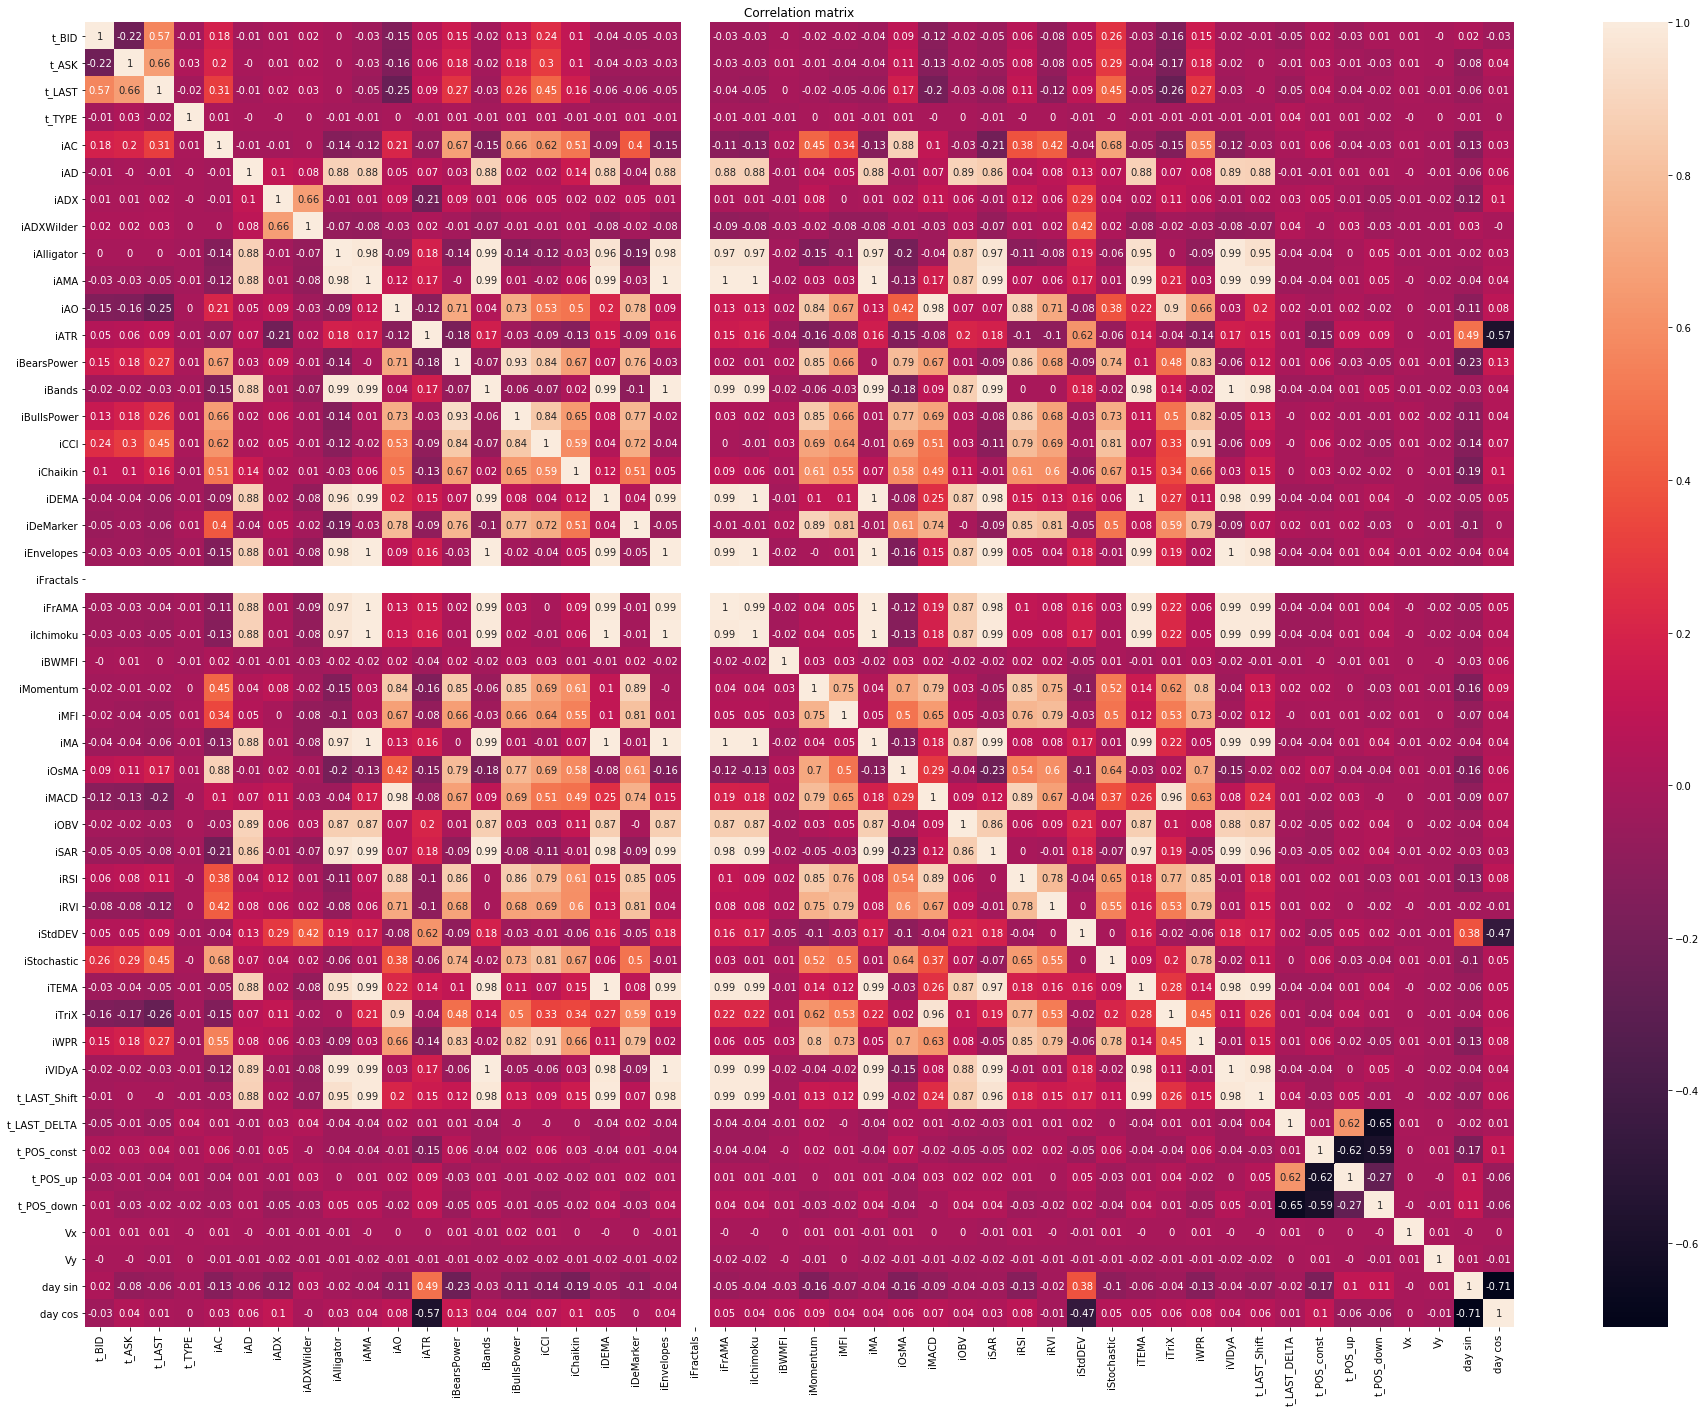

In [14]:
import seaborn as sns

plt.figure(figsize = (32, 24))
sns.heatmap(df.corr().round(2), annot = True)
plt.title('Correlation matrix')

In [15]:
y=df['t_LAST_DELTA']
y.loc[0]

-4.0

In [16]:
#feature_list=['t_LAST','iMomentum', 'iMFI','iStochastic', 'iStdDEV', 'Vx', 'Vy', 'day sin', 'day cos']
feature_list=['t_LAST', 'iStdDEV', 'Vx', 'Vy', 'day sin', 'day cos','iMFI','iStochastic']

In [18]:
#y=x_Mn['t_LAST_DELTA']
x=df[feature_list]

In [24]:
time_step=30

In [25]:
x_matrix = []
y_matrix = y.loc[time_step:]
y_values_matrix = []

y_matrix = pd.DataFrame(y_matrix)

for index, row in y_matrix.iterrows():
    x_matrix.append(x[index-time_step:index])
    y_values_matrix.append(row.values)

In [26]:
x_values_matrix = []
for element in x_matrix:
    x_values_matrix.append(element.values)

In [27]:
x_values_matrix = np.array(x_values_matrix)
y_values_matrix = np.array(y_values_matrix)

#### Undersampling

In [78]:
x_processed=[]
y_processed=[]
aux=0
for i in range(len(y_values_matrix)):
    if np.array_equal(y_values_matrix[i],np.array([1,0,0])):
        x_processed.append(x_values_matrix[i])
        y_processed.append(y_values_matrix[i])
    if np.array_equal(y_values_matrix[i],np.array([0,1,0])):
        x_processed.append(x_values_matrix[i])
        y_processed.append(y_values_matrix[i])
    if np.array_equal(y_values_matrix[i],np.array([0,0,1])):
        if aux==2:
            x_processed.append(x_values_matrix[i])
            y_processed.append(y_values_matrix[i])
            aux=0
        else:
            aux+=1

In [30]:
x_processed=x_values_matrix
y_processed=y_values_matrix

In [79]:
up=0
down=0
const=0
for i in range(len(y_processed)):
    if np.array_equal(y_processed[i],np.array([1,0,0])):
        up+=1
    if np.array_equal(y_processed[i],np.array([0,1,0])):
        down+=1
    if np.array_equal(y_processed[i],np.array([0,0,1])):
        const+=1
print(up)
print(down)
print(const)

2735
2544
2381


In [80]:
x_processed=np.array(x_processed)
y_processed=np.array(y_processed)

In [81]:
len(y_processed)

7660

#### Train test split

In [31]:
split =int(len(x_processed)*0.7)
print(split)

8695


In [32]:
#train_X, test_X, train_y, test_y = train_test_split(x_processed, y_processed, random_state = 0)
train_X, test_X, train_y, test_y = x_processed[:split], x_processed[split:], y_processed[:split], y_processed[split:]
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8695, 30, 8) (8695, 1) (3727, 30, 8) (3727, 1)


#### Over sampling

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE('minority')

In [ ]:
train_X_squeeze=train_X.reshape(len(train_X),len(train_X[0]) * len(train_X[0][0]))
print(train_X_squeeze.shape)

In [ ]:
#layer = tf.keras.layers.LayerNormalization(axis=1)
#output = layer(train_X[rand])

In [ ]:
train_X_os, train_y_os = smote.fit_sample(train_X_squeeze, train_y)
print(train_X_os.shape, train_y_os.shape)

In [ ]:
train_X_os, train_y_os = smote.fit_sample(train_X_os, train_y_os)

In [ ]:
print(train_X_os.shape, train_y_os.shape)

In [ ]:
up=0
down=0
const=0
for i in range(len(train_y_os)):
    if np.array_equal(train_y_os[i],np.array([1,0,0])):
        up+=1
    if np.array_equal(train_y_os[i],np.array([0,1,0])):
        down+=1
    if np.array_equal(train_y_os[i],np.array([0,0,1])):
        const+=1
print(up)
print(down)
print(const)

In [ ]:
train_X_os = train_X_os.reshape(len(train_X_os), len(train_X[0]), len(train_X[0][0]))
print(train_X_os.shape, train_y_os.shape)

#### Visualize

In [ ]:
ready = False

In [ ]:
#plt.imshow(train_X[index], norm=norm)
#norm = mlt.colors.Normalize(vmin=0.,vmax=1.)
layer = tf.keras.layers.LayerNormalization(axis=1)
fig=plt.figure(figsize=(9,15))
for i in range(5):
    while (not ready):
        rand = random.randint(0, len(train_y)-1)
        if np.array_equal(train_y[rand],[1.0, 0., 0.]):
            plt.subplot(1,5,i+1)
            plt.subplot(1,5,i+1)
            
            output = layer(train_X[rand])
            plt.imshow(output)
            #plt.imshow(train_X[rand], norm=norm)
            plt.title(str(rand)+' / '+str(train_y[rand]))
            ready = True
    ready=False

In [35]:
#callbacks = myCallback()
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.6):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True
        
#callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
def scheduler(epoch, lr):
  if epoch < 25:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

def weights_cal_and_fit(sequencial,X_train, y_train,validation_data, w_cal, w_epochs, MAX_EPOCHS):
        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,mode='min')
    
        model_loss=np.zeros(w_cal)
        weights_holder=[]
        for i in range(w_cal):
            model=sequencial
            model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(lr=1e-2, momentum=0.9),metrics=["accuracy"])
            temp_history = model.fit(X_train, y_train, epochs=w_epochs,validation_data=validation_data,verbose=0)
            model_loss.put(i, temp_history.history['accuracy'][-1])
            weights_holder.append(model)
        model=weights_holder[np.argmax(model_loss)]
        history = model.fit(X_train, y_train, epochs=MAX_EPOCHS,batch_size=72,validation_data=validation_data)
        return history, model

In [85]:
from tensorflow import keras
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

In [36]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(train_X[0].shape)))
model.add(tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),input_shape=[None]))
model.add(tf.keras.layers.LSTM(100, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(32))
model.add(tf.keras.layers.Dense(32,kernel_regularizer=tf.keras.regularizers.L1(0.002),activity_regularizer=tf.keras.regularizers.L2(0.02)))
model.add(tf.keras.layers.Dense(1))

#optimizer=keras.optimizers.Adam(lr=1e-3),

optimizer = tf.keras.optimizers.SGD(lr=1e-3, momentum=0.9)
model.compile(loss='mae', optimizer=optimizer,metrics=['mse'])
my_callback1 = tf.keras.callbacks.LearningRateScheduler(scheduler)
my_callback2 = myCallback()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 240)               0         
_________________________________________________________________
lambda_2 (Lambda)            (None, 240, 1)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 240, 100)          40800     
_________________________________________________________________
dropout_2 (Dropout)          (None, 240, 100)          0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                17024     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [87]:
%%time
#VOLUME 1
MAX_EPOCHS=400

history = model.fit(train_X, train_y, epochs=1,batch_size=72, validation_data=(test_X, test_y),verbose=2,shuffle=False,)

Epoch 1/400
75/75 - 53s - loss: 1.6190 - tp: 709.0000 - fp: 1280.0000 - tn: 9444.0000 - fn: 4653.0000 - accuracy: 0.6312 - precision: 0.3565 - recall: 0.1322 - auc: 0.5175 - val_loss: 1.4697 - val_tp: 3.0000 - val_fp: 0.0000e+00 - val_tn: 4596.0000 - val_fn: 2295.0000 - val_accuracy: 0.6671 - val_precision: 1.0000 - val_recall: 0.0013 - val_auc: 0.5388
Epoch 2/400
75/75 - 51s - loss: 1.5105 - tp: 195.0000 - fp: 392.0000 - tn: 10332.0000 - fn: 5167.0000 - accuracy: 0.6544 - precision: 0.3322 - recall: 0.0364 - auc: 0.5078 - val_loss: 1.4420 - val_tp: 3.0000 - val_fp: 0.0000e+00 - val_tn: 4596.0000 - val_fn: 2295.0000 - val_accuracy: 0.6671 - val_precision: 1.0000 - val_recall: 0.0013 - val_auc: 0.5055
Epoch 3/400
75/75 - 51s - loss: 1.4793 - tp: 86.0000 - fp: 183.0000 - tn: 10541.0000 - fn: 5276.0000 - accuracy: 0.6606 - precision: 0.3197 - recall: 0.0160 - auc: 0.5041 - val_loss: 1.4291 - val_tp: 4.0000 - val_fp: 0.0000e+00 - val_tn: 4596.0000 - val_fn: 2294.0000 - val_accuracy: 0.6672

In [ ]:
%%time
#VOLUME 2
MAX_EPOCHS=200
history = model.fit(train_X, train_y, epochs=MAX_EPOCHS,batch_size=32, validation_data=(test_X, test_y),verbose=2,shuffle=False,)

In [ ]:
%%time
history, model= weights_cal_and_fit(model,train_X, train_y,(test_X, test_y), 100, 5, MAX_EPOCHS)

In [ ]:
plt.plot(history.history['accuracy'][:], label='train')
plt.plot(history.history['val_accuracy'][:], label='test')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'][:], label='train')
plt.plot(history.history['val_loss'][:], label='test')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['val_tn'][:], label='train')
plt.plot(history.history['val_tn'][:], label='test')
plt.legend()
plt.show()

In [88]:
mlt.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_metrics(history):
  metrics =  ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

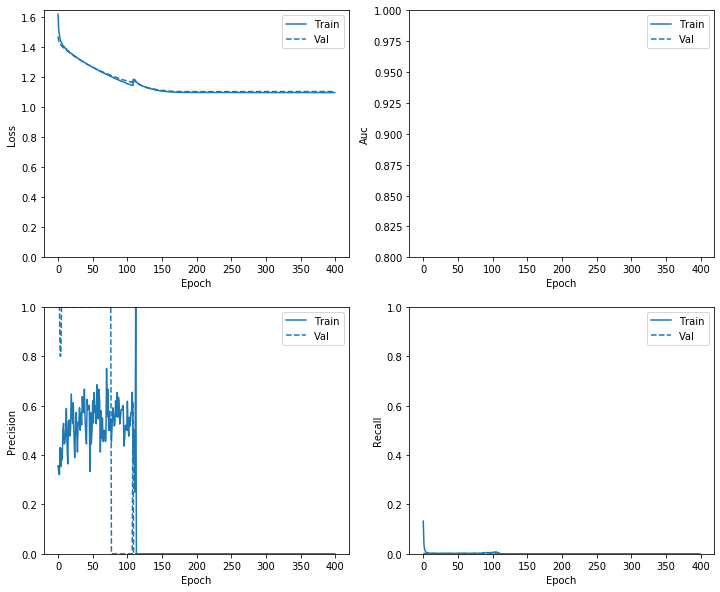

In [89]:
# Volume 1
plot_metrics(history)

In [ ]:
# Volume 2
plot_metrics(history)

In [ ]:
model.evaluate(x_processed, y_processed)

In [65]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(train_X[0].shape)))
model.add(tf.keras.layers.LayerNormalization())
model.add(tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),input_shape=[None]))
model.add(tf.keras.layers.SimpleRNN(100, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.SimpleRNN(32))
model.add(tf.keras.layers.Dense(32,kernel_regularizer=tf.keras.regularizers.L1(0.002),activity_regularizer=tf.keras.regularizers.L2(0.02)))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

#optimizer=keras.optimizers.Adam(lr=1e-3),
loss=keras.losses.CategoricalCrossentropy(),

optimizer = tf.keras.optimizers.SGD(lr=1e-3, momentum=0.9)
model.compile(loss=loss,optimizer=optimizer,metrics=METRICS)
my_callback1 = tf.keras.callbacks.LearningRateScheduler(scheduler)
my_callback2 = myCallback()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 270)               0         
_________________________________________________________________
layer_normalization_3 (Layer (None, 270)               540       
_________________________________________________________________
lambda_3 (Lambda)            (None, 270, 1)            0         
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 270, 100)          10200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 270, 100)          0         
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                4256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)               

In [66]:
%%time
#VOLUME 1
MAX_EPOCHS=200
history = model.fit(train_X, train_y, epochs=MAX_EPOCHS,batch_size=72, validation_data=(test_X, test_y),verbose=2,shuffle=False,)

Epoch 1/200
75/75 - 19s - loss: 1.5612 - tp: 401.0000 - fp: 864.0000 - tn: 9860.0000 - fn: 4961.0000 - accuracy: 0.6379 - precision: 0.3170 - recall: 0.0748 - auc: 0.4842 - val_loss: 1.4350 - val_tp: 1.0000 - val_fp: 7.0000 - val_tn: 4589.0000 - val_fn: 2297.0000 - val_accuracy: 0.6658 - val_precision: 0.1250 - val_recall: 4.3516e-04 - val_auc: 0.5057
Epoch 2/200
75/75 - 18s - loss: 1.4661 - tp: 186.0000 - fp: 284.0000 - tn: 10440.0000 - fn: 5176.0000 - accuracy: 0.6606 - precision: 0.3957 - recall: 0.0347 - auc: 0.5148 - val_loss: 1.4255 - val_tp: 0.0000e+00 - val_fp: 2.0000 - val_tn: 4594.0000 - val_fn: 2298.0000 - val_accuracy: 0.6664 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5024
Epoch 3/200
75/75 - 18s - loss: 1.4409 - tp: 64.0000 - fp: 115.0000 - tn: 10609.0000 - fn: 5298.0000 - accuracy: 0.6635 - precision: 0.3575 - recall: 0.0119 - auc: 0.5135 - val_loss: 1.4161 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 4596.0000 - val_fn: 2298.0000 - val_accur

In [67]:
mlt.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_metrics(history):
  metrics =  ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

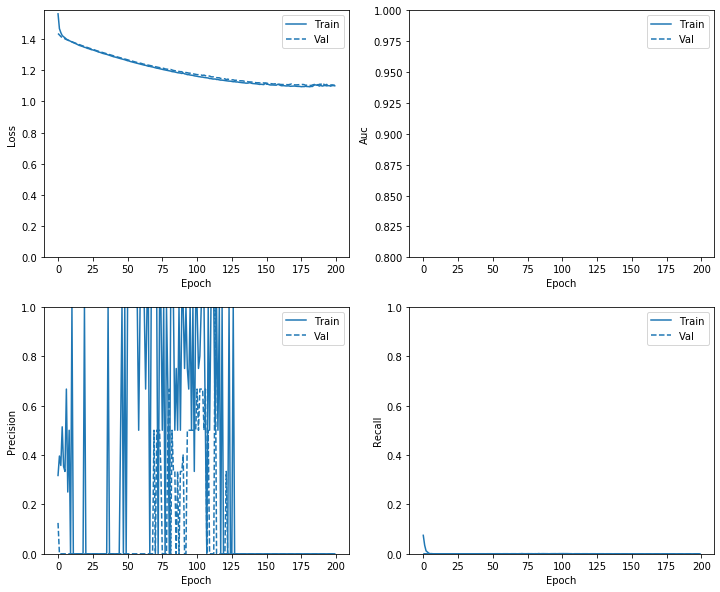

In [68]:
# Volume 1
plot_metrics(history)

In [69]:
%%time
#VOLUME 1
MAX_EPOCHS=400
history = model.fit(train_X, train_y, epochs=MAX_EPOCHS,batch_size=72, validation_data=(test_X, test_y),verbose=2,shuffle=False,)

Epoch 1/400
75/75 - 18s - loss: 1.0995 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 10724.0000 - fn: 5362.0000 - accuracy: 0.6667 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5276 - val_loss: 1.1058 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 4596.0000 - val_fn: 2298.0000 - val_accuracy: 0.6667 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4944
Epoch 2/400
75/75 - 18s - loss: 1.0999 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 10724.0000 - fn: 5362.0000 - accuracy: 0.6667 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5264 - val_loss: 1.1077 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 4596.0000 - val_fn: 2298.0000 - val_accuracy: 0.6667 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4907
Epoch 3/400
75/75 - 18s - loss: 1.0991 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 10724.0000 - fn: 5362.0000 - accuracy: 0.6667 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5279 - val_loss: 1.1053 - val_tp: 0.0000e+00 - val_fp: 0.0000e+

KeyboardInterrupt: 

In [70]:
mlt.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_metrics(history):
  metrics =  ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

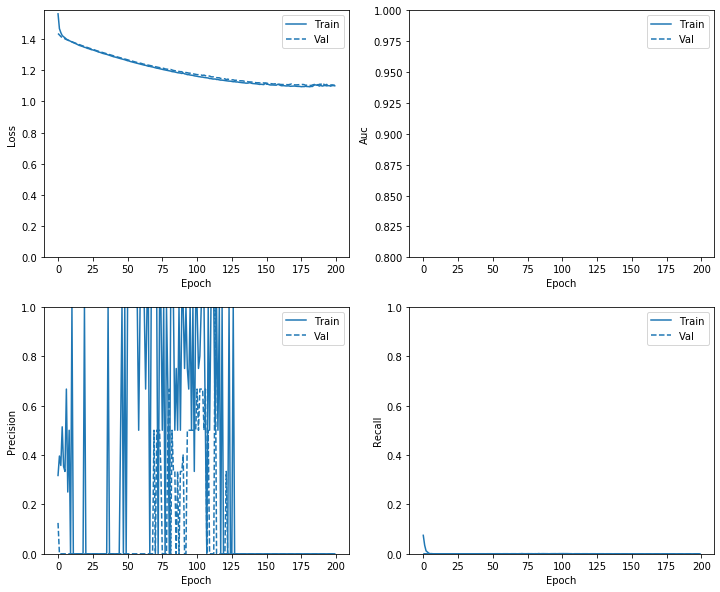

In [71]:
# Volume 1
plot_metrics(history)

## ====================================================================

## Baseline model

### Build the model

Now create and train your model using the function that was defined earlier. Notice that the model is fit using a larger than default batch size of 2048, this is important to ensure that each batch has a decent chance of containing a few positive samples. If the batch size was too small, they would likely have no fraudulent transactions to learn from.


Note: this model will not handle the class imbalance well. You will improve it later in this tutorial.

In [ ]:
def make_model(metrics = METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(train_X[0].shape)),
    tf.keras.layers.LayerNormalization(),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),input_shape=[None]),
    tf.keras.layers.SimpleRNN(64, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(32,kernel_regularizer=tf.keras.regularizers.L1(0.002),activity_regularizer=tf.keras.regularizers.L2(0.02)),
    tf.keras.layers.Dense(3, activation='softmax')
])

  model.compile(
      optimizer=tf.keras.optimizers.SGD(lr=1e-3, momentum=0.9),
      loss=keras.losses.CategoricalCrossentropy(),
      metrics=metrics)

  return model

In [ ]:
EPOCHS = 100
BATCH_SIZE = 32

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [ ]:
model = make_model()
model.summary()

Test run the model:

In [ ]:
model.predict(train_X[:10])

### Optional: Set the correct initial bias.

These initial guesses are not great. You know the dataset is imbalanced. Set the output layer's bias to reflect that (See: [A Recipe for Training Neural Networks: "init well"](http://karpathy.github.io/2019/04/25/recipe/#2-set-up-the-end-to-end-trainingevaluation-skeleton--get-dumb-baselines)). This can help with initial convergence.

With the default bias initialization the loss should be about `math.log(2) = 0.69314` 

In [ ]:
results = model.evaluate(train_X, train_y, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

The correct bias to set can be derived from:

$$ p_0 = pos/(pos + neg) = 1/(1+e^{-b_0}) $$
$$ b_0 = -log_e(1/p_0 - 1) $$
$$ b_0 = log_e(pos/neg)$$

In [ ]:
initial_bias = np.log([up+down/const])
initial_bias

Set that as the initial bias, and the model will give much more reasonable initial guesses. 

It should be near: `pos/total = 0.0018`

In [ ]:
model = make_model(output_bias = initial_bias)
model.predict(train_X[:10])

With this initialization the initial loss should be approximately:

$$-p_0log(p_0)-(1-p_0)log(1-p_0) = 0.01317$$

In [ ]:
results = model.evaluate(train_X, train_y, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

This initial loss is about 50 times less than if would have been with naive initialization.

This way the model doesn't need to spend the first few epochs just learning that positive examples are unlikely. This also makes it easier to read plots of the loss during training.

### Checkpoint the initial weights

To make the various training runs more comparable, keep this initial model's weights in a checkpoint file, and load them into each model before training.

In [ ]:
import os
import tempfile
initial_weights = os.path.join(tempfile.mkdtemp(),'initial_weights')
model.save_weights(initial_weights)

### Confirm that the bias fix helps

Before moving on, confirm quick that the careful bias initialization actually helped.

Train the model for 20 epochs, with and without this careful initialization, and compare the losses: 

In [ ]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0,0.0,0.0])
zero_bias_history = model.fit(
    train_X,
    train_y,
    batch_size=BATCH_SIZE,
    epochs=10,
    validation_data=(test_X, test_y), 
    verbose=0)

In [ ]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_X,
    train_y,
    batch_size=BATCH_SIZE,
    epochs=10,
    validation_data=(test_X, test_y), 
    verbose=0)

In [ ]:
def plot_loss(history, label, n):
  # Use a log scale to show the wide range of values.
  plt.semilogy(history.epoch,  history.history['loss'],
               color=colors[n], label='Train '+label)
  plt.semilogy(history.epoch,  history.history['val_loss'],
          color=colors[n], label='Val '+label,
          linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  
  plt.legend()

In [ ]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [ ]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_X,
    train_y,
    batch_size=BATCH_SIZE,
    epochs=100,
    callbacks = [early_stopping],
    validation_data=(test_X, test_y))

In [ ]:
plot_metrics(baseline_history)

In [ ]:
#model.save('models/RNN_model')

In [ ]:
model.evaluate(x_processed, y_processed)

## ====================================================================

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LayerNormalization(input_shape=(train_X[0].shape)))
#model.add(tf.keras.layers.Conv1D(64, 5, activation='relu'))
#model.add(tf.keras.layers.MaxPooling1D(pool_size=4))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),input_shape=[None]))
model.add(tf.keras.layers.LSTM(64, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.15))
model.add(tf.keras.layers.LSTM(32))
model.add(tf.keras.layers.Dense(64,kernel_regularizer=tf.keras.regularizers.L1(0.002),activity_regularizer=tf.keras.regularizers.L2(0.02)))
model.add(tf.keras.layers.Dense(3, activation= 'softmax'))
#model.add(tf.keras.layers.Lambda(lambda x: tf.squeeze(x, axis=-1),input_shape=[None]))
#model.add(tf.keras.layers.SimpleRNN(100))
#model.add(tf.keras.layers.Dense(1, activation= 'relu'))

#optimizer = 'adam'
optimizer = tf.keras.optimizers.SGD(lr=1e-3, momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=optimizer, metrics=METRICS)
model.summary()

In [ ]:
%%time
#KeyboardInterrupt
MAX_EPOCHS=80
history = model.fit(train_X, train_y, epochs=MAX_EPOCHS,batch_size=32, validation_data=(test_X, test_y),verbose=2,shuffle=False)

In [ ]:
%%time
history, model= weights_cal_and_fit(model,train_X, train_y,(test_X, test_y), 300, 5, MAX_EPOCHS)

In [ ]:
plt.plot(history.history['accuracy'][:], label='train')
plt.plot(history.history['val_accuracy'][:], label='test')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'][:], label='train')
plt.plot(history.history['val_loss'][:], label='test')
plt.legend()
plt.show()

In [ ]:
yhat = model.predict(test_X)

In [ ]:
ps = yhat[:100]
ts = test_y[:100]

In [ ]:
plt.figure(figsize=(20, 6))
#dlm.plot_series(np.arange(len(ps)), ps[:])
plt.subplot(211)
plt.plot(np.arange(len(ps)), [x[2] for x in ps[:]])
#plt.subplot(212)
plt.plot(np.arange(len(ts)), [x[2] for x in ts[:]])
plt.grid()

In [ ]:
t1 = tml.thread_main_loop(RNN_model, 30, 9, 0, "0", "1",1,1) #azul new_dt
t1.start()

In [ ]:
t1.kill()

In [ ]:
t1.join()

In [ ]:
loaded_model = tf.keras.models.load_model('models/RNN_model')
loaded_model.summary()

In [ ]:
RNN_model = loaded_model

In [ ]:
RNN_model.evaluate(test_X,test_y)

In [ ]:
t1 = thread_training.thread_training(model, train_X, train_y, 1000, 72, (test_X, test_y), 1, False) 
t1_history = t1.start()

In [ ]:
#import os
#os.system('shutdown -s')